# Programming for Data Analysis Project 2019 

<p align="center"> <img width="800" height="600" src="Images/accident1.jpg" alt="Choice Function Description" /> </p>

###  Table of Contents<a id="table"/>

* [Goals and objectives](#goals)
* [Introduction](#intro)
* [Dataset review](#dataset)
* [Summary](#summary)
* [References](#references)

## Goals and objectives<a id="goals"/>

* Choose a real-world phenomenon that can be measured and for which could collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their
relationships with each other
* Synthesise/simulate a data set as closely matching their properties as possible.
* Use a Jupyter notebook for research and implement the simulation inside

[**<<<**](#table)

## Introduction<a id="intro"/>

This Jupyter notebook discusses the creation of a dataset showing the road accident across Ireland of various type of severity and time span also factor per fixed number of citizens, vehicles in the distribution of each member state to generate results in line with currently published data sources referenced in the document.

The road safety is common problem and priorites for many countries in the EU and world. There are many factor that influence road accident and is hard to analyse all of them with details. This project will focus on major variables which are published in the statistical reports by state agencies and based on this the dataset will be created.

At the begining is worth to look on real official data about road safety in Ireland and see how these statistics look in respect of other countries of the EU. The chart below is coming from OECD data and shows dead on the roads in 2017 in the EU per million of inhabitants with highlighting Ireland.  

<p align="center"> <img width="800" height="400" src="Images/EU.png" alt="Choice Function Description" /> </p>

It can be seen that Ireland is in the leading part of that chart with resonable small number of fatalities on the roads.
This statistics idealy should be brought death value to zero for safety but in reality any efforts should be carried out to improve road safety.

What are the main factors that cause accidents? According to RSA below infographic gather the most common culprits.

<p align="center"> <img width="800" height="400" src="Images/Main_Questions.png" alt="Choice Function Description" /> </p>

The number of road deaths dropped by 4% last year, the lowest number of fatalities on the roads since records began.
Provisional statistics up to 31 December 2018 show that a total of 149 people lost their lives on Ireland’s roads as a result of 142 fatal crashes.
This compares with 156 deaths as a result of 141 fatal crashes in 2017, making last year the safest year on Ireland’s roads since deaths were first recorded in 1959.[1]




[**<<<**](#table)

## Dataset review<a id="dataset"/>

As mentioned in previous paragraph road accidents by nature have many factors that have to be investigated with connection to each other. For the purpose of this project, there will be limited factors used to create a synthesized dataset as a main goal of this task is to show the process of data creation and simulation of this phenomenon rather than deep analyse of all possible factors etc. 

The dataset will include the following data and parameters:

|Variable|Description|Data Type|Distributions|
|------|---------------|----------------|---------------|
|Loacation|City/Town|Text|Normal|
|Road User|Type of road user|Text|Normal|
|Collision Type|Consequence of an accident|killed/injured|Bernoulli|
|Age Groups|Age of road user|0-99|Normal|
|Gender|Gender of road user|male/female|Bernoulli|
|Month|Time in the year|Text|Normal|
|Alcohol Related|Was alcohol involved|yes/no|Bernoulli|


The time period will be one year. All relationship between the variables will be simulated and review during the dataset creation process.

Based on data from Cental Statistical Office [3] the total number of all kind of road accidents in 2012 was above 8000.

<p align="center"> <img width="800" height="400" src="Images/total_accidents.png" alt="Choice Function Description" /> </p>

The created dataset will contain 8000 entries for all accidents. 

In [1]:
# Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sets a chart style
sns.set(style="darkgrid", color_codes=True)
# Use magic function to render the figure in a notebook
%matplotlib inline

At the begining is necessary to create all possible selections for each variable.
The first is the location. In this case the data from CSO will be used to reflect the entire State. CSO counts number of inhabitants in all major locations like Dublin, Galway, Limerick etc. that include Cities and their suburbans areas and called them i.e. "Dublin and suburbans areas" but for this project this will be simplified and called just cities names that including all suburbans areas i.e. "Dublin". To reduce number of all locations the bigest cities and town in different part of coutry were picked. 

In [2]:
# Create all possible locations
# Read data csv from CSO
population = pd.read_csv("Data/population.csv")
# Name colums
population.columns = ['Place','Inhabitants']
# Create data frame
df = pd.DataFrame(population)
# Picked the bigest cities and town
df = df[0:30]
# Assign location from the data
location = df.Place
# Display number of entries
location

0          Dublin
1            Cork
2        Limerick
3          Galway
4       Waterford
5        Drogheda
6          Swords
7         Dundalk
8            Bray
9           Navan
10       Kilkenny
11          Ennis
12         Carlow
13         Tralee
14      Newbridge
15     Portlaoise
16     Balbriggan
17           Naas
18        Athlone
19      Mullingar
20      Celbridge
21        Wexford
22    Letterkenny
23          Sligo
24     Greystones
25        Clonmel
26       Malahide
27    Carrigaline
28        Leixlip
29      Tullamore
Name: Place, dtype: object

There is 30 location picked from CSO data. 

In further step the four major group of road user will be created.

In [3]:
# Create all road user options
road_user = ['Pedestrians', 'Cyclists', 'Motorbike', 'Car']

The collision type was limited to two option whcih are the most important. It will be check if victim of accident was death or injured. For detailed analyse this option can be investigated further i.e. major, minor injurys, no injurys at all, damage to vehicle or property without any harm issue to the road user etc.

In [4]:
# Create collision types
collision = ['Killed','Injured']

The age group include all possible option and is not limited only to the driving licenced users as they are the majority on the road. This age group include passengers, cyclists and pedestrians. Looking at the report from RSA the age group was divided into eleven age categories.

In [5]:
# Create age groups
age = ['0-5', '6-9', '10-14', '15-17', '18-20', '21-24', '25-34', '35-44', '45-54', '55-64', '65-100']

The next factor that will be checked is the gender of road user involved in the accident. It is worth to check how gender impacts the data.

In [6]:
# Create gender options
gender = ['male', 'female']

It is important to model data with consideration of time of the year as the different months have a significant influence on the road conditions.

In [7]:
# Create all monts in the year
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

At the end, the variable that indicates if alcohol was involved as accidents culprit on the roads.

In [8]:
# Create influence of alcohol possibility
alcohol = ['yes', 'no']

### Generating a number of accidents

The starting point in the creation of dataset will be to distribute a number of accidents by locations. Looking at the number of inhabitants in each place it might be a way to try to determine the weight of probability for generating data.

In [9]:
df.head()

,Place,Inhabitants
0,Dublin,1173179
1,Cork,208669
2,Limerick,94192
3,Galway,79934
4,Waterford,53504


In [10]:
total = df.Inhabitants.sum()
total

2198054

The total number of people living in all locations is **2,198,054**.

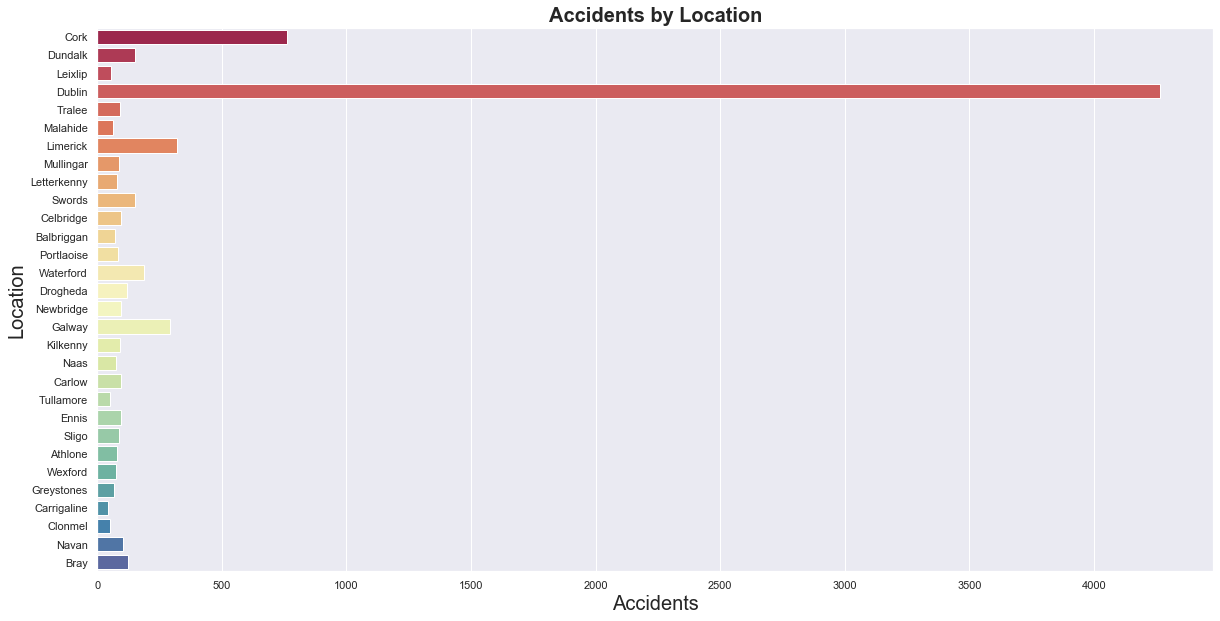

In [11]:
# Determind probability
pr = (df['Inhabitants']/total).tolist()
# Distribute accidents across location with defined probability 
accidents = pd.DataFrame({'Place': np.random.choice(location, 8000, p=pr)})
# Defines chart size
plt.rcParams['figure.figsize'] = (20,10)
# Show results 
sns.countplot(y='Place', data=accidents, palette="Spectral")
# Defines chart lables
plt.title("Accidents by Location", fontweight="bold", fontsize=20)
plt.xlabel('Accidents',fontsize=20)
plt.ylabel('Location',fontsize=20)

plt.show()

The result is not surprising. The Dublin, Cork, Galway and Limerick are leading areas of the road accidents in Ireland.

### Classify Accident Road Users

At this stage, the groups ( Pedestrians, Cyclists, Motorbike, Car) of road user will be considered. Reviewing RSA statistics is clear that car users and pedestrians are the largest groups that need to included in the distribution.  

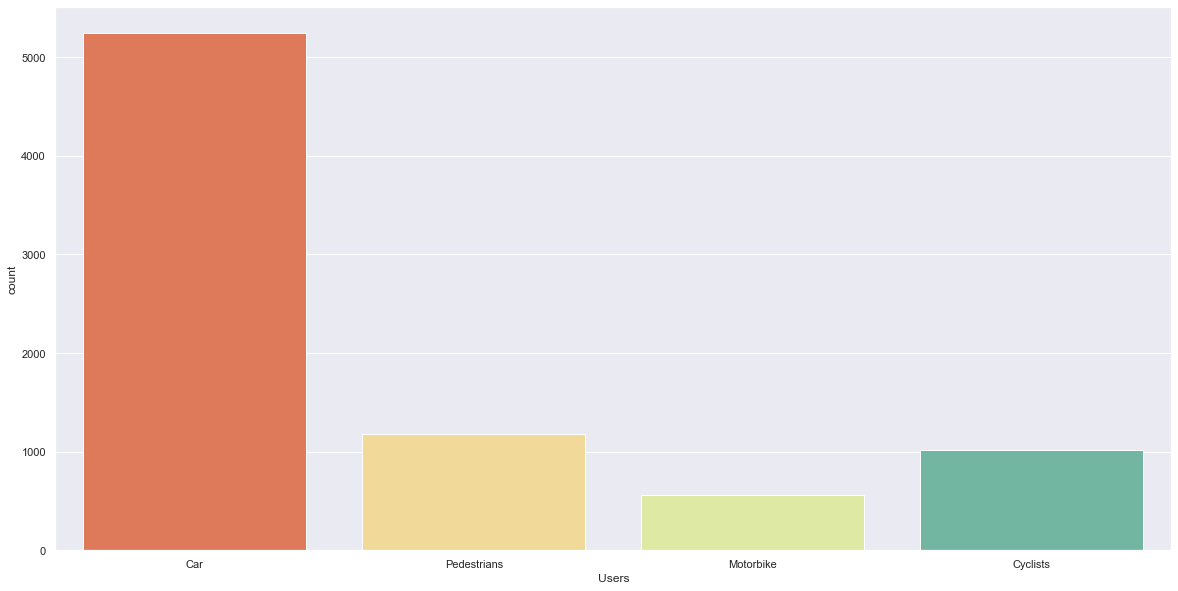

In [12]:
users = pd.DataFrame({'Users': np.random.choice(road_user, 8000, p=[0.15, 0.13, 0.07, 0.65] )})
sns.countplot(x='Users', data=users, palette="Spectral")
plt.show()

### Collision Type

[**<<<**](#table)

## Summary<a id="summary"/>

[**<<<**](#table)

## References<a id="references"/>

1. [OECD Data - Road accidents](https://data.oecd.org/transport/road-accidents.htm)
1. [thejournal.ie - 2018 accidents summary](https://www.thejournal.ie/2018-saw-the-lowest-number-of-deaths-on-irish-roads-since-records-began-in-1959-4419050-Jan2019/)
1. [Central Statistics Office - Traffic Collisions and Casualties by County, Statistical Indicator and
Year ](https://statbank.cso.ie/px/pxeirestat/Statire/Graphics/MakeGraph.asp?menu=y&pxfile=2019121122103214424086ROA20.px&gr_type=1&PLanguage=0)
1. []()
1. []()
1. []()
1. []()
1. []()
1. []()
1. []()
1. []()
1. []()

[**<<<**](#table)